In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Lesson 1

In [2]:
from sklearn import datasets

iris = datasets.load_iris()

type(iris)

sklearn.datasets.base.Bunch

In [3]:
print(iris.keys())

dict_keys(['target_names', 'target', 'feature_names', 'data', 'DESCR'])


In [4]:
type(iris.data)

numpy.ndarray

In [5]:
type(iris.target)

numpy.ndarray

In [6]:
y = iris['target']
X = iris['data']
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


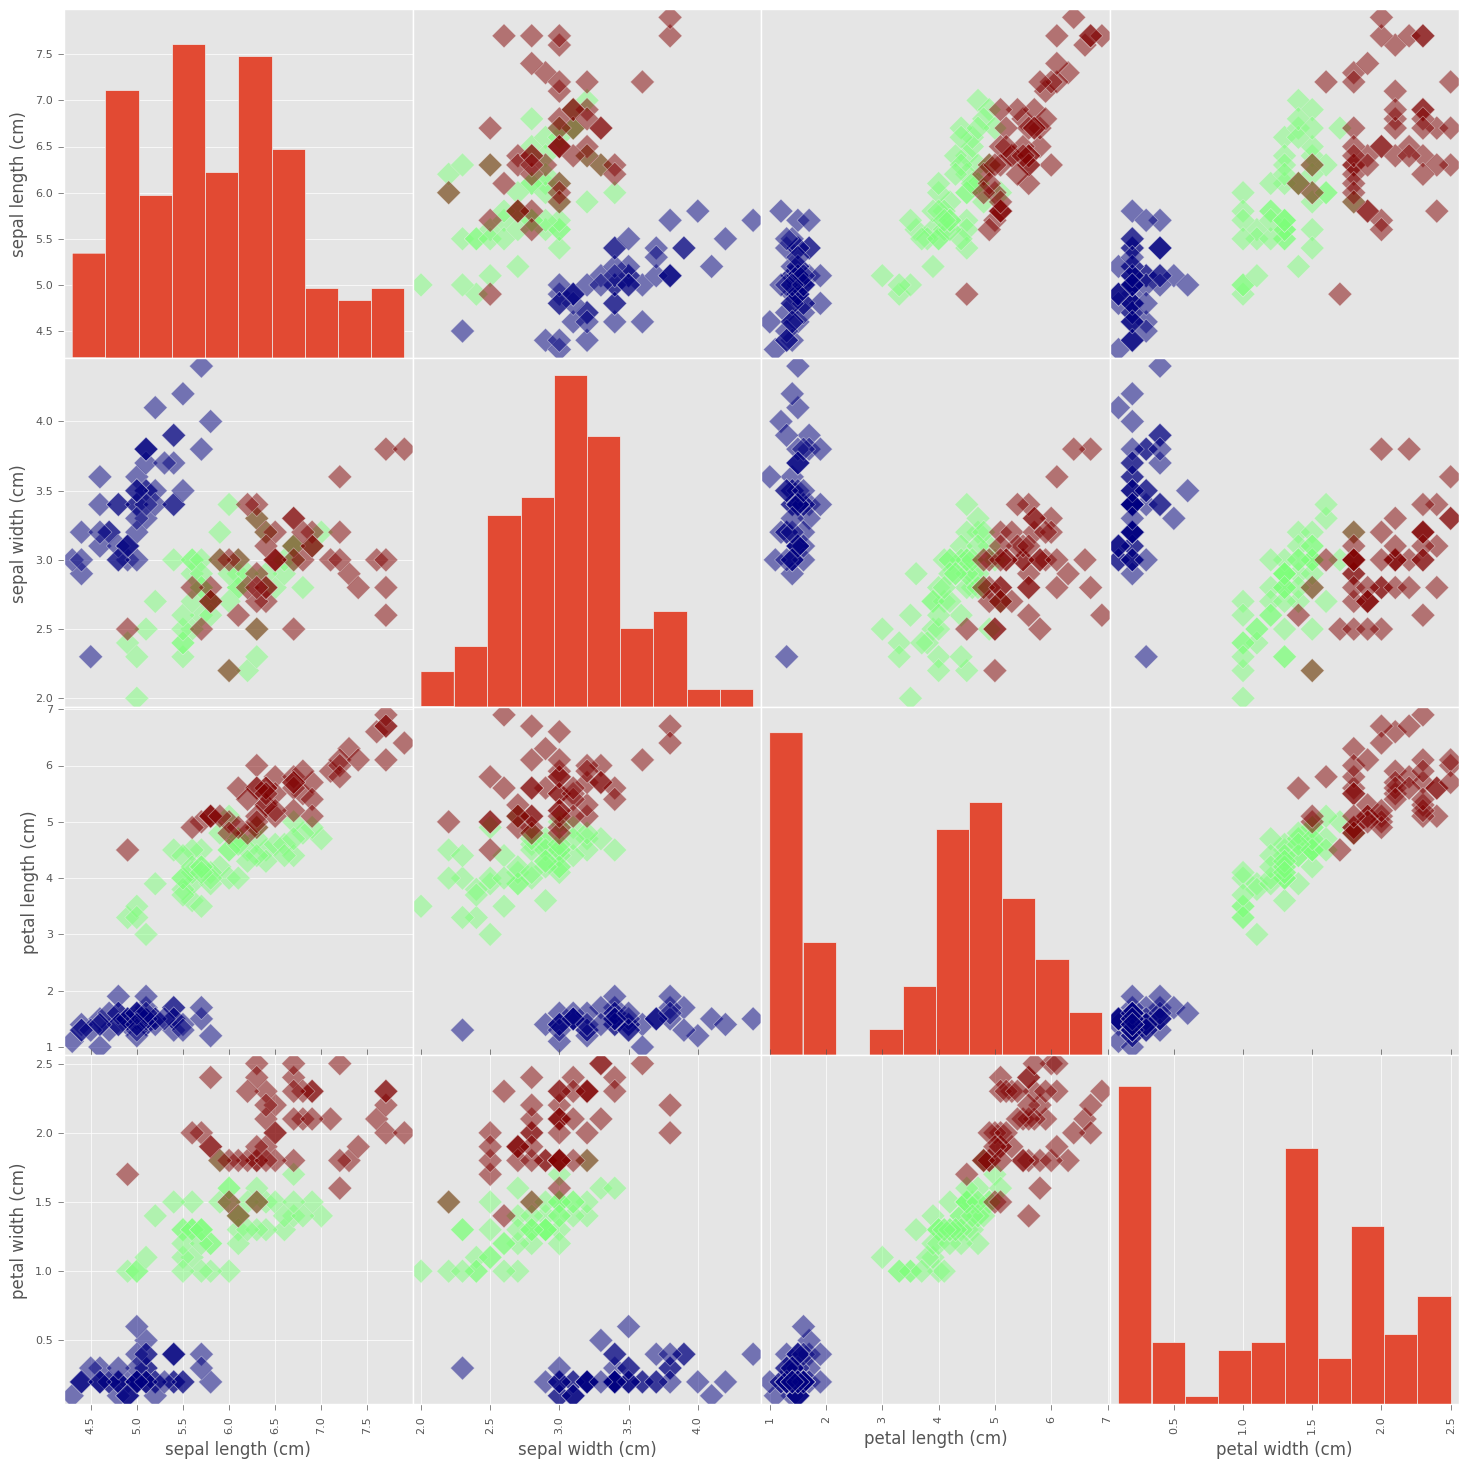

In [7]:
_ = pd.scatter_matrix(df, c = y, figsize = [18,18], s=150, marker='D')

# Lesson 2

In [8]:
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [9]:
iris['data'].shape

(150, 4)

In [10]:
iris['target'].shape

(150,)

In [11]:
#do NOT include generation of X_new in video
X_new = np.random.rand(3,4)*5

X_new.shape

(3, 4)

In [12]:
prediction = knn.predict(X_new)

prediction.shape

(3,)

In [13]:
print("Prediction: {}".format(prediction)) 
print("Predicted target name: {}".format(
    iris['target_names'][prediction]))

Prediction: [1 1 0]
Predicted target name: ['versicolor' 'versicolor' 'setosa']


# Lesson 3

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.3, random_state=21,
                                                    stratify=iris['target'])

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [15]:
knn.score(X_test, y_test)

0.9555555555555556